# Часть 1. Универсальная теорема аппроксимации

# Импорты

In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


# Генерируем данные

In [3]:
def x_sin(x):
    return x*np.sin(x)

x_sin(np.array([1,2,3]))

array([0.84147098, 1.81859485, 0.42336002])

In [4]:
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [5]:
def create_data(data_start, data_end, n, f):
    x_train = np.linspace(data_start, data_end, n)
    y_train = f(x_train)

    return (x_train, y_train)

x_train, y_train = create_data(0,5,10, x_sin)

(x_train, y_train)

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([ 0.        ,  0.29300855,  0.99576911,  1.65901326,  1.76715568,
         0.98844998, -0.63522654, -2.64311427, -4.28585385, -4.79462137]))

# Сделаем наши данные

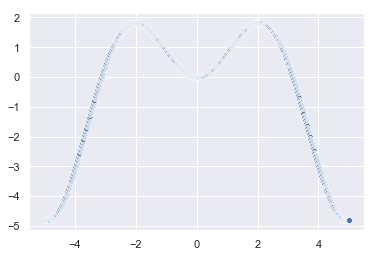

In [6]:
x_train, y_train = create_data(-5, 5, 1000, x_sin)
sns.scatterplot(x_train, y_train);

# Пробуем широкую модель

In [7]:
def create_wide_model(units=1000):
    
    # API метод
    
    x = Input(shape=(1, ))    
    h = Dense(units, activation="sigmoid")(x)
    y = Dense(1, activation="linear")(h)
    model = Model(x, y)
    
    model.compile(optimizer=Adam(lr=0.01),
                 loss="mean_squared_error",
                 metrics=["mean_squared_error"])
    
    return model

In [8]:
wide_model = create_wide_model(100)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
wide_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
#обучаемся
wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1000/1000 [==============================] - 0s 130us/step - loss: 4.9198 - mean_squared_error: 4.9198
Epoch 2/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8446 - mean_squared_error: 4.8446
Epoch 3/1000
1000/1000 [==============================] - 0s 14us/step - loss: 4.8568 - mean_squared_error: 4.8568
Epoch 4/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.9782 - mean_squared_error: 4.9782
Epoch 5/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.7495 - mean_squared_error: 4.7495
Epoch 6/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.7380 - mean_squared_error: 4.7380
Epoch 7/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.6237 - mean_squared_error: 4.6237
Epoch 8/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.4701 - mean_squared_error: 4.4701
Epoch 9/1000
1000/1000 [========

1000/1000 [==============================] - 0s 9us/step - loss: 0.8781 - mean_squared_error: 0.8781
Epoch 70/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8597 - mean_squared_error: 0.8597
Epoch 71/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8443 - mean_squared_error: 0.8443
Epoch 72/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8378 - mean_squared_error: 0.8378
Epoch 73/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8292 - mean_squared_error: 0.8292
Epoch 74/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8267 - mean_squared_error: 0.8267
Epoch 75/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8222 - mean_squared_error: 0.8222
Epoch 76/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8050 - mean_squared_error: 0.8050
Epoch 77/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8013 - mean_s

1000/1000 [==============================] - 0s 8us/step - loss: 0.3736 - mean_squared_error: 0.3736
Epoch 140/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3662 - mean_squared_error: 0.3662
Epoch 141/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3648 - mean_squared_error: 0.3648
Epoch 142/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3614 - mean_squared_error: 0.3614
Epoch 143/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.3611 - mean_squared_error: 0.3611
Epoch 144/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3537 - mean_squared_error: 0.3537
Epoch 145/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3522 - mean_squared_error: 0.3522
Epoch 146/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3446 - mean_squared_error: 0.3446
Epoch 147/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.3353 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 210/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 211/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 212/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 213/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 214/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 215/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 216/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 217/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0027 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 280/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 281/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 282/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 283/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 284/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 285/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 286/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 287/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 

1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 350/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 351/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 352/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 353/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 354/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 355/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 356/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 357/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0020 

1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 420/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 421/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 422/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 423/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 424/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 425/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 426/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 427/1000
1000/1000 [==============================] - 0s 7us/step - loss:

1000/1000 [==============================] - 0s 7us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 489/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 490/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 491/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 492/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 493/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 494/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 495/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 496/1000
1000/1000 [==============================] - 0s 7us/step - loss:

1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 559/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 560/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 561/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 562/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 563/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 564/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 565/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 566/1000
1000/1000 [==============================] - 0s 8us/step - l

1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 627/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 628/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 629/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.2010e-04 - mean_squared_error: 9.2010e-04
Epoch 630/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 631/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 632/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 633/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 634/1000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 10us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 696/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 697/1000
1000/1000 [==============================] - 0s 9us/step - loss: 9.6619e-04 - mean_squared_error: 9.6619e-04
Epoch 698/1000
1000/1000 [==============================] - 0s 9us/step - loss: 9.6032e-04 - mean_squared_error: 9.6032e-04
Epoch 699/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 700/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 701/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 702/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 703/1000
1000/1000 [==============================] - 0s 8us

1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 764/1000
1000/1000 [==============================] - 0s 9us/step - loss: 8.0850e-04 - mean_squared_error: 8.0850e-04
Epoch 765/1000
1000/1000 [==============================] - 0s 9us/step - loss: 9.2421e-04 - mean_squared_error: 9.2421e-04
Epoch 766/1000
1000/1000 [==============================] - 0s 9us/step - loss: 7.6551e-04 - mean_squared_error: 7.6551e-04
Epoch 767/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 768/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 769/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.4143e-04 - mean_squared_error: 8.4143e-04
Epoch 770/1000
1000/1000 [==============================] - 0s 8us/step - loss: 7.1607e-04 - mean_squared_error: 7.1607e-04
Epoch 771/1000
1000/1000 [=============

1000/1000 [==============================] - 0s 8us/step - loss: 8.2934e-04 - mean_squared_error: 8.2934e-04
Epoch 832/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.1555e-04 - mean_squared_error: 9.1555e-04
Epoch 833/1000
1000/1000 [==============================] - 0s 7us/step - loss: 8.5244e-04 - mean_squared_error: 8.5244e-04
Epoch 834/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 835/1000
1000/1000 [==============================] - 0s 7us/step - loss: 8.0585e-04 - mean_squared_error: 8.0585e-04
Epoch 836/1000
1000/1000 [==============================] - 0s 7us/step - loss: 9.0861e-04 - mean_squared_error: 9.0861e-04
Epoch 837/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.3048e-04 - mean_squared_error: 8.3048e-04
Epoch 838/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.4520e-04 - mean_squared_error: 8.4520e-04
Epoch 839/1000
1000/1000 [=

1000/1000 [==============================] - 0s 7us/step - loss: 7.6211e-04 - mean_squared_error: 7.6211e-04
Epoch 899/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.0192e-04 - mean_squared_error: 8.0192e-04
Epoch 900/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.8988e-04 - mean_squared_error: 8.8988e-04
Epoch 901/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.6949e-04 - mean_squared_error: 8.6949e-04
Epoch 902/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.5140e-04 - mean_squared_error: 8.5140e-04
Epoch 903/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.9375e-04 - mean_squared_error: 8.9375e-04
Epoch 904/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 905/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 906/1000
1000/1000 [=====

1000/1000 [==============================] - 0s 11us/step - loss: 7.1193e-04 - mean_squared_error: 7.1193e-04
Epoch 966/1000
1000/1000 [==============================] - 0s 12us/step - loss: 8.7169e-04 - mean_squared_error: 8.7169e-04
Epoch 967/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 968/1000
1000/1000 [==============================] - 0s 26us/step - loss: 8.1323e-04 - mean_squared_error: 8.1323e-04
Epoch 969/1000
1000/1000 [==============================] - 0s 18us/step - loss: 6.7238e-04 - mean_squared_error: 6.7238e-04
Epoch 970/1000
1000/1000 [==============================] - 0s 13us/step - loss: 6.5132e-04 - mean_squared_error: 6.5132e-04
Epoch 971/1000
1000/1000 [==============================] - 0s 13us/step - loss: 6.3454e-04 - mean_squared_error: 6.3454e-04
Epoch 972/1000
1000/1000 [==============================] - 0s 12us/step - loss: 6.8274e-04 - mean_squared_error: 6.8274e-04
Epoch 973/1000
1000/100

In [11]:
#предсказываем результаты
y_pred = wide_model.predict(x_train)

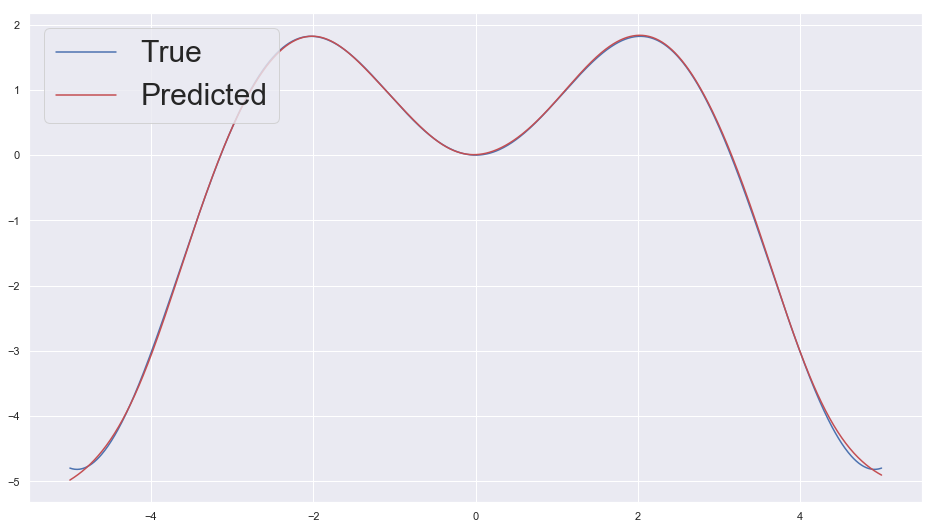

In [12]:
#визуализируем данные
def visualize_predictions(x, y_true, model):
    y_pred = model.predict(x).reshape(y_true.shape)
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, c="b", label="True")
    ax.plot(x, y_pred, c="r", label="Predicted")
    ax.legend(loc=2, prop={'size': 30})
    
    plt.show()
    

visualize_predictions(x_train, y_train, wide_model)

## Собираем все воедино

Epoch 1/1000
1000/1000 [==============================] - 0s 157us/step - loss: 4.8953 - mean_squared_error: 4.8953
Epoch 2/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8728 - mean_squared_error: 4.8728
Epoch 3/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8474 - mean_squared_error: 4.8474
Epoch 4/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8043 - mean_squared_error: 4.8043
Epoch 5/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8097 - mean_squared_error: 4.8097
Epoch 6/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7507 - mean_squared_error: 4.7507
Epoch 7/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7122 - mean_squared_error: 4.7122
Epoch 8/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.6263 - mean_squared_error: 4.6263
Epoch 9/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.3910 -

1000/1000 [==============================] - 0s 9us/step - loss: 0.8333 - mean_squared_error: 0.8333
Epoch 73/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8261 - mean_squared_error: 0.8261
Epoch 74/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8142 - mean_squared_error: 0.8142
Epoch 75/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.8188 - mean_squared_error: 0.8188
Epoch 76/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7894 - mean_squared_error: 0.7894
Epoch 77/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7808 - mean_squared_error: 0.7808
Epoch 78/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.7868 - mean_squared_error: 0.7868
Epoch 79/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7719 - mean_squared_error: 0.7719
Epoch 80/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7570 - mean_s

1000/1000 [==============================] - 0s 8us/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 143/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 144/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 145/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 146/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 147/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 148/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 149/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 150/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0763 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 213/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 214/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 215/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 216/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 217/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 218/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 219/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 220/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0029 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 283/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 284/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 285/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 286/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 287/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 288/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 289/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 290/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0018

1000/1000 [==============================] - 0s 8us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 353/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0021 - mean_squared_error: 0.0021   
Epoch 354/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 355/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 356/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 357/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 358/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 359/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 360/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.

1000/1000 [==============================] - 0s 8us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 423/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 424/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 425/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 426/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 427/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 428/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 429/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 430/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 

1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 493/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 494/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 495/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 496/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 497/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 498/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 499/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 500/1000
1000/1000 [==============================] - 0s 9us/step - l

1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 563/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 564/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 565/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 566/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 567/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 568/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 569/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 570/1000
1000/1000 [==============================] - 0s 8us/step

1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 632/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 633/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 634/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 635/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 636/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 637/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 638/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 639/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0

1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 702/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 703/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 704/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 705/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 706/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 707/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 708/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 709/1000
1000/1000 [==============================] - 0s 9us/step - loss:

1000/1000 [==============================] - 0s 8us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 771/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 772/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 773/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 774/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 775/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 776/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 777/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 778/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.001

1000/1000 [==============================] - 0s 10us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 840/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0027 - mean_squared_error: 0.0027   
Epoch 841/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 842/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 843/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 844/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 845/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 846/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 847/1000
1000/1000 [==============================] - 0s 9us/step - 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 908/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 909/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 910/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 911/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 912/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 913/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 914/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.6379e-04 - mean_squared_error: 9.6379e-04
Epoch 915/1000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 977/1000
1000/1000 [==============================] - 0s 9us/step - loss: 9.8993e-04 - mean_squared_error: 9.8993e-04
Epoch 978/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 979/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 980/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 981/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 982/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 983/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.0022 - mean_squared_error: 0.00 - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 984/1000
1000

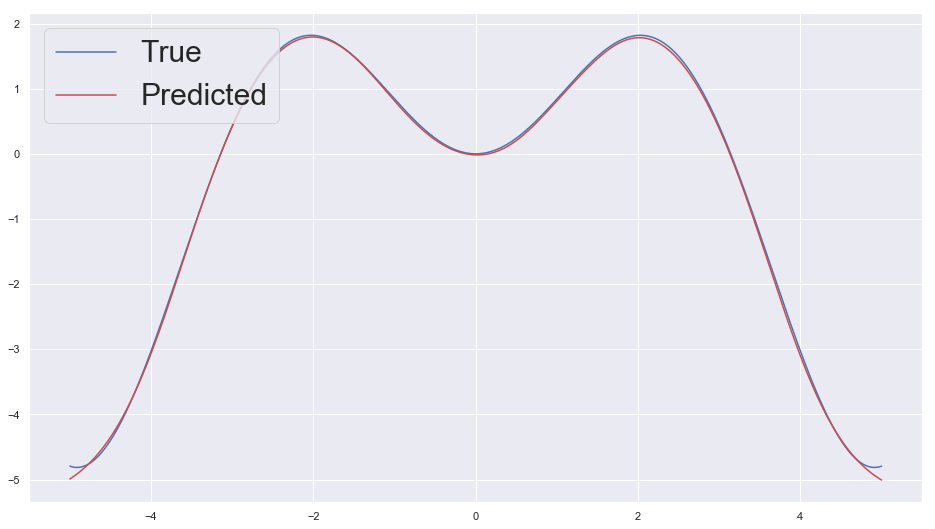

In [13]:
wide_model = create_wide_model(100)
wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)
visualize_predictions(x_train, y_train, wide_model)

# Применим глубокую сеть

In [14]:
def create_deep_model(units):
    
    # Sequential метод
    
    model = Sequential()
    model.add(Dense(units[0], activation='sigmoid', input_dim=1))
    
    for unit in units[1:]:
        model.add(Dense(unit, activation='sigmoid'))
    
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(lr=0.01),
                 loss="mse",
                 metrics=["mse"])
    
    return model

In [15]:
deep_model = create_deep_model([50,25,10])

In [16]:
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 244us/step - loss: 4.9459 - mean_squared_error: 4.9459
Epoch 2/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8866 - mean_squared_error: 4.8866
Epoch 3/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8586 - mean_squared_error: 4.8586
Epoch 4/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8351 - mean_squared_error: 4.8351
Epoch 5/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8320 - mean_squared_error: 4.8320
Epoch 6/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.8199 - mean_squared_error: 4.8199
Epoch 7/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.8117 - mean_squared_error: 4.8117
Epoch 8/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.8069 - mean_squared_error: 4.8069
Epoch 9/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.6

1000/1000 [==============================] - 0s 10us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 72/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 73/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 74/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 76/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 77/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 78/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 79/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0013

1000/1000 [==============================] - 0s 13us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 141/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 142/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 143/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 144/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 145/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 146/1000
1000/1000 [==============================] - 0s 11us/step - loss: 9.5222e-04 - mean_squared_error: 9.5222e-04
Epoch 147/1000
1000/1000 [==============================] - 0s 11us/step - loss: 9.2386e-04 - mean_squared_error: 9.2386e-04
Epoch 148/1000
1000/1000 [==============================] - 0s 

Epoch 208/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.8386e-04 - mean_squared_error: 8.8386e-04
Epoch 209/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.5107e-04 - mean_squared_error: 8.5107e-04
Epoch 210/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 211/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 212/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 213/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 214/1000
1000/1000 [==============================] - 0s 12us/step - loss: 8.0266e-04 - mean_squared_error: 8.0266e-04
Epoch 215/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0014 - mean_squared_error: 0.0014   
Epoch 216/1000
1000/1000 [===========

1000/1000 [==============================] - 0s 11us/step - loss: 6.6632e-04 - mean_squared_error: 6.6632e-04
Epoch 277/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.6004e-04 - mean_squared_error: 8.6004e-04
Epoch 278/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.4080e-04 - mean_squared_error: 7.4080e-04
Epoch 279/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.0844e-04 - mean_squared_error: 8.0844e-04
Epoch 280/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.6300e-04 - mean_squared_error: 7.6300e-04
Epoch 281/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.2377e-04 - mean_squared_error: 8.2377e-04
Epoch 282/1000
1000/1000 [==============================] - 0s 11us/step - loss: 8.0490e-04 - mean_squared_error: 8.0490e-04
Epoch 283/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.6913e-04 - mean_squared_error: 7.6913e-04
Epoch 284/1000


1000/1000 [==============================] - 0s 10us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 344/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 345/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 346/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 347/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 348/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012   
Epoch 349/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.0745e-04 - mean_squared_error: 8.0745e-04
Epoch 350/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.3706e-04 - mean_squared_error: 7.3706e-04
Epoch 351/1000
1000/1000 [==============================] - 0s

1000/1000 [==============================] - 0s 10us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 410/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 411/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 412/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 413/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.9710e-04 - mean_squared_error: 6.9710e-04
Epoch 414/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.3878e-04 - mean_squared_error: 6.3878e-04
Epoch 415/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.7560e-04 - mean_squared_error: 6.7560e-04
Epoch 416/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.4766e-04 - mean_squared_error: 5.4766e-04
Epoch 417/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 476/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 477/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 478/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 479/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 480/1000
1000/1000 [==============================] - 0s 12us/step - loss: 7.2349e-04 - mean_squared_error: 7.2349e-04
Epoch 481/1000
1000/1000 [==============================] - 0s 12us/step - loss: 6.8366e-04 - mean_squared_error: 6.8366e-04
Epoch 482/1000
1000/1000 [==============================] - 0s 12us/step - loss: 6.0847e-04 - mean_squared_error: 6.0847e-04
Epoch 483/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s 10us/step - loss: 3.4270e-04 - mean_squared_error: 3.4270e-04
Epoch 542/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.0696e-04 - mean_squared_error: 4.0696e-04
Epoch 543/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8345e-04 - mean_squared_error: 4.8345e-04
Epoch 544/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.1841e-04 - mean_squared_error: 3.1841e-04
Epoch 545/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.7041e-04 - mean_squared_error: 3.7041e-04
Epoch 546/1000
1000/1000 [==============================] - 0s 12us/step - loss: 3.3269e-04 - mean_squared_error: 3.3269e-04
Epoch 547/1000
1000/1000 [==============================] - 0s 11us/step - loss: 9.6149e-04 - mean_squared_error: 9.6149e-04
Epoch 548/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.3661e-04 - mean_squared_error: 8.3661e-04
Epoch 549/1000


1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 608/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.4625e-04 - mean_squared_error: 6.4625e-04
Epoch 609/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.4851e-04 - mean_squared_error: 3.4851e-04
Epoch 610/1000
1000/1000 [==============================] - 0s 11us/step - loss: 9.3628e-04 - mean_squared_error: 9.3628e-04
Epoch 611/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012   
Epoch 612/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0019 - mean_squared_error: 0.0019   
Epoch 613/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.1575e-04 - mean_squared_error: 6.1575e-04
Epoch 614/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.5447e-04 - mean_squared_error: 3.5447e-04
Epoch 615/1000
1000/1000 [=======

1000/1000 [==============================] - 0s 10us/step - loss: 2.2207e-04 - mean_squared_error: 2.2207e-04
Epoch 674/1000
1000/1000 [==============================] - ETA: 0s - loss: 2.3251e-04 - mean_squared_error: 2.3251e- - 0s 11us/step - loss: 1.8775e-04 - mean_squared_error: 1.8775e-04
Epoch 675/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.9724e-04 - mean_squared_error: 1.9724e-04
Epoch 676/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.2141e-04 - mean_squared_error: 2.2141e-04
Epoch 677/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.1678e-04 - mean_squared_error: 3.1678e-04
Epoch 678/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.3489e-04 - mean_squared_error: 2.3489e-04
Epoch 679/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.6138e-04 - mean_squared_error: 2.6138e-04
Epoch 680/1000
1000/1000 [==============================] - 0s 10us/step - loss:

1000/1000 [==============================] - 0s 10us/step - loss: 2.4691e-04 - mean_squared_error: 2.4691e-04
Epoch 739/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1570e-04 - mean_squared_error: 2.1570e-04
Epoch 740/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.3513e-04 - mean_squared_error: 2.3513e-04
Epoch 741/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6028e-04 - mean_squared_error: 1.6028e-04
Epoch 742/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.4781e-04 - mean_squared_error: 1.4781e-04
Epoch 743/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.8776e-04 - mean_squared_error: 1.8776e-04
Epoch 744/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6353e-04 - mean_squared_error: 1.6353e-04
Epoch 745/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6960e-04 - mean_squared_error: 1.6960e-04
Epoch 746/1000


1000/1000 [==============================] - 0s 11us/step - loss: 3.2540e-04 - mean_squared_error: 3.2540e-04
Epoch 805/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.8891e-04 - mean_squared_error: 3.8891e-04
Epoch 806/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.7500e-04 - mean_squared_error: 2.7500e-04
Epoch 807/1000
1000/1000 [==============================] - 0s 13us/step - loss: 3.1383e-04 - mean_squared_error: 3.1383e-04
Epoch 808/1000
1000/1000 [==============================] - 0s 12us/step - loss: 2.0787e-04 - mean_squared_error: 2.0787e-04
Epoch 809/1000
1000/1000 [==============================] - 0s 12us/step - loss: 1.7442e-04 - mean_squared_error: 1.7442e-04
Epoch 810/1000
1000/1000 [==============================] - 0s 12us/step - loss: 1.4704e-04 - mean_squared_error: 1.4704e-04
Epoch 811/1000
1000/1000 [==============================] - 0s 12us/step - loss: 1.3824e-04 - mean_squared_error: 1.3824e-04
Epoch 812/1000


1000/1000 [==============================] - 0s 11us/step - loss: 4.0855e-04 - mean_squared_error: 4.0855e-04
Epoch 871/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.7474e-04 - mean_squared_error: 2.7474e-04
Epoch 872/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.6272e-04 - mean_squared_error: 2.6272e-04
Epoch 873/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.2433e-04 - mean_squared_error: 2.2433e-04
Epoch 874/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1687e-04 - mean_squared_error: 2.1687e-04
Epoch 875/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6365e-04 - mean_squared_error: 1.6365e-04
Epoch 876/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.4250e-04 - mean_squared_error: 1.4250e-04
Epoch 877/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.4183e-04 - mean_squared_error: 1.4183e-04
Epoch 878/1000


1000/1000 [==============================] - 0s 10us/step - loss: 5.8936e-04 - mean_squared_error: 5.8936e-04
Epoch 936/1000
1000/1000 [==============================] - 0s 12us/step - loss: 8.7873e-04 - mean_squared_error: 8.7873e-04
Epoch 937/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.9472e-04 - mean_squared_error: 4.9472e-04
Epoch 938/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.1642e-04 - mean_squared_error: 3.1642e-04
Epoch 939/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.9670e-04 - mean_squared_error: 3.9670e-04
Epoch 940/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.8563e-04 - mean_squared_error: 7.8563e-04
Epoch 941/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.0583e-04 - mean_squared_error: 4.0583e-04
Epoch 942/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.7388e-04 - mean_squared_error: 3.7388e-04
Epoch 943/1000


1000/1000 [==============================] - 0s 14us/step - loss: 0.0111 - mean_squared_error: 0.0111


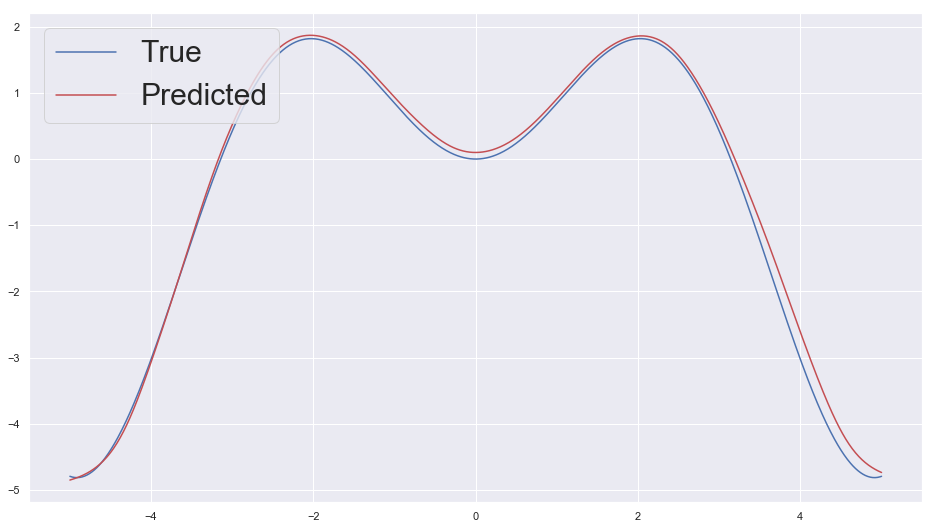

In [17]:
visualize_predictions(x_train, y_train, deep_model)

# Берем функцию посложнее

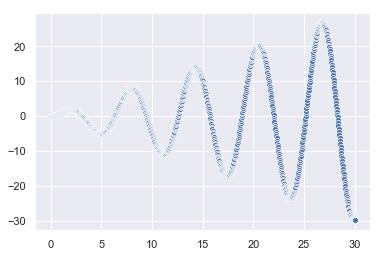

In [18]:
x_train, y_train = create_data(0, 30, 1000, x_sin)
sns.scatterplot(x_train, y_train);

# Широкая модель на сложной функции

In [19]:
wide_model = create_wide_model(1200)
wide_history = wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 208us/step - loss: 165.4884 - mean_squared_error: 165.4884
Epoch 2/1000
1000/1000 [==============================] - 0s 11us/step - loss: 157.1315 - mean_squared_error: 157.1315
Epoch 3/1000
1000/1000 [==============================] - 0s 10us/step - loss: 154.7519 - mean_squared_error: 154.7519
Epoch 4/1000
1000/1000 [==============================] - 0s 11us/step - loss: 154.8088 - mean_squared_error: 154.8088
Epoch 5/1000
1000/1000 [==============================] - 0s 11us/step - loss: 155.8426 - mean_squared_error: 155.8426
Epoch 6/1000
1000/1000 [==============================] - 0s 11us/step - loss: 153.5344 - mean_squared_error: 153.5344
Epoch 7/1000
1000/1000 [==============================] - 0s 12us/step - loss: 153.4399 - mean_squared_error: 153.4399
Epoch 8/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.6705 - mean_squared_error: 152.6705
Epoch 9/1000
1000/1000 [=======================

1000/1000 [==============================] - 0s 11us/step - loss: 153.1652 - mean_squared_error: 153.1652
Epoch 70/1000
1000/1000 [==============================] - 0s 11us/step - loss: 153.1023 - mean_squared_error: 153.1023
Epoch 71/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.8867 - mean_squared_error: 152.8867
Epoch 72/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.7453 - mean_squared_error: 152.7453
Epoch 73/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.6953 - mean_squared_error: 152.6953
Epoch 74/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.8030 - mean_squared_error: 152.8030
Epoch 75/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.4174 - mean_squared_error: 152.4174
Epoch 76/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.8190 - mean_squared_error: 152.8190
Epoch 77/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s 12us/step - loss: 152.2608 - mean_squared_error: 152.2608
Epoch 138/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.5552 - mean_squared_error: 152.5552
Epoch 139/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.4395 - mean_squared_error: 152.4395
Epoch 140/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.6006 - mean_squared_error: 152.6006
Epoch 141/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.7166 - mean_squared_error: 152.7166
Epoch 142/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.7042 - mean_squared_error: 152.7042
Epoch 143/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.6448 - mean_squared_error: 152.6448
Epoch 144/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3794 - mean_squared_error: 152.3794
Epoch 145/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 152.0578 - mean_squared_error: 152.0578
Epoch 205/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.0938 - mean_squared_error: 152.0938
Epoch 206/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1286 - mean_squared_error: 152.1286
Epoch 207/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3091 - mean_squared_error: 152.3091
Epoch 208/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3380 - mean_squared_error: 152.3380
Epoch 209/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1553 - mean_squared_error: 152.1553
Epoch 210/1000
1000/1000 [==============================] - ETA: 0s - loss: 148.4193 - mean_squared_error: 148.41 - 0s 11us/step - loss: 152.2796 - mean_squared_error: 152.2796
Epoch 211/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.2103 - mean_squared_error: 

1000/1000 [==============================] - 0s 11us/step - loss: 151.8992 - mean_squared_error: 151.8992
Epoch 272/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.8624 - mean_squared_error: 151.8624
Epoch 273/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.8954 - mean_squared_error: 151.8954
Epoch 274/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.9106 - mean_squared_error: 151.9106
Epoch 275/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.9316 - mean_squared_error: 151.9316
Epoch 276/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.8972 - mean_squared_error: 151.8972
Epoch 277/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.9381 - mean_squared_error: 151.9381
Epoch 278/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.8805 - mean_squared_error: 151.8805
Epoch 279/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 151.9023 - mean_squared_error: 151.9023
Epoch 339/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.7469 - mean_squared_error: 151.7469
Epoch 340/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.7898 - mean_squared_error: 151.7898
Epoch 341/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.7468 - mean_squared_error: 151.7468
Epoch 342/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.6820 - mean_squared_error: 151.6820
Epoch 343/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.6926 - mean_squared_error: 151.6926
Epoch 344/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.1241 - mean_squared_error: 152.1241
Epoch 345/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.8537 - mean_squared_error: 151.8537
Epoch 346/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.6806 - mean_squared_error: 151.6806
Epoch 406/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6702 - mean_squared_error: 151.6702
Epoch 407/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6913 - mean_squared_error: 151.6913
Epoch 408/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6313 - mean_squared_error: 151.6313
Epoch 409/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5848 - mean_squared_error: 151.5848
Epoch 410/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.7564 - mean_squared_error: 151.7564
Epoch 411/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.6757 - mean_squared_error: 151.6757
Epoch 412/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.8524 - mean_squared_error: 151.8524
Epoch 413/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.5088 - mean_squared_error: 151.5088
Epoch 473/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5234 - mean_squared_error: 151.5234
Epoch 474/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5030 - mean_squared_error: 151.5030
Epoch 475/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5928 - mean_squared_error: 151.5928
Epoch 476/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.4068 - mean_squared_error: 151.4068
Epoch 477/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.4643 - mean_squared_error: 151.4643
Epoch 478/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.4714 - mean_squared_error: 151.4714
Epoch 479/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.4379 - mean_squared_error: 151.4379
Epoch 480/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 151.1224 - mean_squared_error: 151.1224
Epoch 540/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.1481 - mean_squared_error: 151.1481
Epoch 541/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.1338 - mean_squared_error: 151.1338
Epoch 542/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.1210 - mean_squared_error: 151.1210
Epoch 543/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.2301 - mean_squared_error: 151.2301
Epoch 544/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.0866 - mean_squared_error: 151.0866
Epoch 545/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.0855 - mean_squared_error: 151.0855
Epoch 546/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.4396 - mean_squared_error: 151.4396
Epoch 547/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 15us/step - loss: 150.7223 - mean_squared_error: 150.7223
Epoch 607/1000
1000/1000 [==============================] - 0s 16us/step - loss: 150.7199 - mean_squared_error: 150.7199
Epoch 608/1000
1000/1000 [==============================] - 0s 16us/step - loss: 150.6378 - mean_squared_error: 150.6378
Epoch 609/1000
1000/1000 [==============================] - 0s 16us/step - loss: 150.7404 - mean_squared_error: 150.7404
Epoch 610/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.6111 - mean_squared_error: 150.6111
Epoch 611/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.6484 - mean_squared_error: 150.6484
Epoch 612/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.6907 - mean_squared_error: 150.6907
Epoch 613/1000
1000/1000 [==============================] - 0s 15us/step - loss: 150.7205 - mean_squared_error: 150.7205
Epoch 614/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 16us/step - loss: 150.1594 - mean_squared_error: 150.1594
Epoch 673/1000
1000/1000 [==============================] - 0s 17us/step - loss: 150.2115 - mean_squared_error: 150.2115
Epoch 674/1000
1000/1000 [==============================] - 0s 17us/step - loss: 150.1632 - mean_squared_error: 150.1632
Epoch 675/1000
1000/1000 [==============================] - 0s 16us/step - loss: 150.2616 - mean_squared_error: 150.2616
Epoch 676/1000
1000/1000 [==============================] - 0s 15us/step - loss: 150.2022 - mean_squared_error: 150.2022
Epoch 677/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.1819 - mean_squared_error: 150.1819
Epoch 678/1000
1000/1000 [==============================] - 0s 16us/step - loss: 150.2200 - mean_squared_error: 150.2200
Epoch 679/1000
1000/1000 [==============================] - 0s 24us/step - loss: 150.2729 - mean_squared_error: 150.2729
Epoch 680/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 149.6775 - mean_squared_error: 149.6775
Epoch 740/1000
1000/1000 [==============================] - 0s 13us/step - loss: 150.0116 - mean_squared_error: 150.0116
Epoch 741/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.7232 - mean_squared_error: 149.7232
Epoch 742/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.7120 - mean_squared_error: 149.7120
Epoch 743/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.5760 - mean_squared_error: 149.5760
Epoch 744/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.6141 - mean_squared_error: 149.6141
Epoch 745/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.5994 - mean_squared_error: 149.5994
Epoch 746/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.6189 - mean_squared_error: 149.6189
Epoch 747/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 149.1674 - mean_squared_error: 149.1674
Epoch 807/1000
1000/1000 [==============================] - 0s 10us/step - loss: 148.8936 - mean_squared_error: 148.8936
Epoch 808/1000
1000/1000 [==============================] - 0s 11us/step - loss: 148.8267 - mean_squared_error: 148.8267
Epoch 809/1000
1000/1000 [==============================] - 0s 11us/step - loss: 148.9097 - mean_squared_error: 148.9097
Epoch 810/1000
1000/1000 [==============================] - 0s 12us/step - loss: 148.7051 - mean_squared_error: 148.7051
Epoch 811/1000
1000/1000 [==============================] - 0s 12us/step - loss: 148.8771 - mean_squared_error: 148.8771
Epoch 812/1000
1000/1000 [==============================] - 0s 11us/step - loss: 148.7219 - mean_squared_error: 148.7219
Epoch 813/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.0200 - mean_squared_error: 149.0200
Epoch 814/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 148.7492 - mean_squared_error: 148.7492
Epoch 873/1000
1000/1000 [==============================] - 0s 12us/step - loss: 148.3670 - mean_squared_error: 148.3670
Epoch 874/1000
1000/1000 [==============================] - 0s 11us/step - loss: 148.3293 - mean_squared_error: 148.3293
Epoch 875/1000
1000/1000 [==============================] - 0s 11us/step - loss: 148.1123 - mean_squared_error: 148.1123
Epoch 876/1000
1000/1000 [==============================] - 0s 11us/step - loss: 147.6083 - mean_squared_error: 147.6083
Epoch 877/1000
1000/1000 [==============================] - 0s 12us/step - loss: 147.9073 - mean_squared_error: 147.9073
Epoch 878/1000
1000/1000 [==============================] - 0s 17us/step - loss: 147.6460 - mean_squared_error: 147.6460
Epoch 879/1000
1000/1000 [==============================] - 0s 17us/step - loss: 148.0632 - mean_squared_error: 148.0632
Epoch 880/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 146.2545 - mean_squared_error: 146.2545
Epoch 940/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.5572 - mean_squared_error: 146.5572
Epoch 941/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.8250 - mean_squared_error: 146.8250
Epoch 942/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.2050 - mean_squared_error: 146.2050
Epoch 943/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.4316 - mean_squared_error: 146.4316
Epoch 944/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.1342 - mean_squared_error: 146.1342
Epoch 945/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.2131 - mean_squared_error: 146.2131
Epoch 946/1000
1000/1000 [==============================] - 0s 12us/step - loss: 147.5990 - mean_squared_error: 147.5990
Epoch 947/1000
1000/1000 [=====================

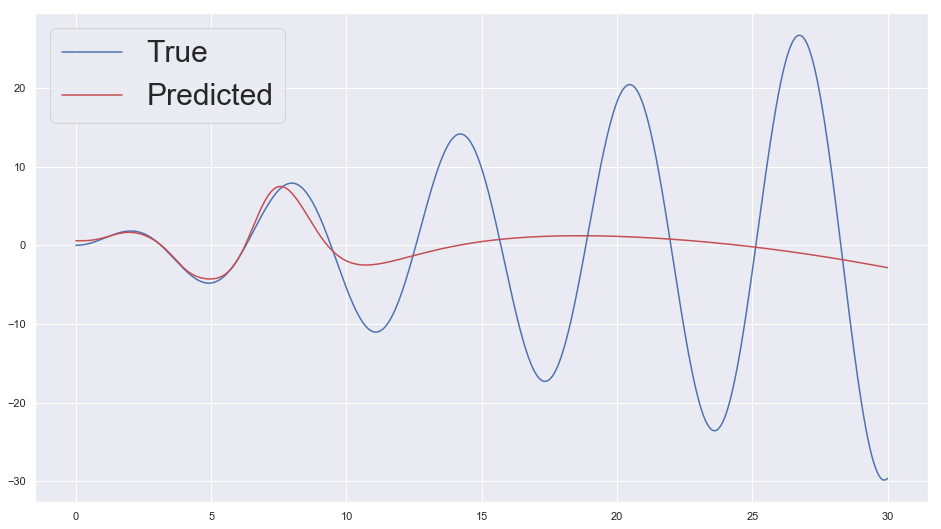

In [20]:
visualize_predictions(x_train, y_train, wide_model)

# Колбэки в keras как способ мониторить обучение

In [21]:
wide_history

In [22]:
wide_history.history.keys()

['mean_squared_error', 'loss']

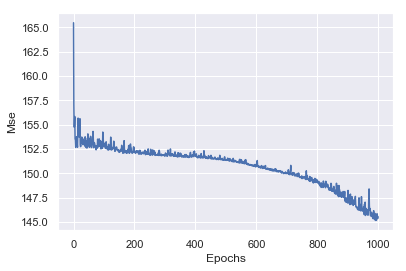

In [23]:
plt.plot(range(len(wide_history.history['loss'])), wide_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.show()

# Глубокая модель во всей своей красе

In [24]:
deep_model = create_deep_model([30,70])
deep_history = deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 269us/step - loss: 153.0352 - mean_squared_error: 153.0352
Epoch 2/1000
1000/1000 [==============================] - 0s 9us/step - loss: 153.0847 - mean_squared_error: 153.0847
Epoch 3/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.8586 - mean_squared_error: 152.8586
Epoch 4/1000
1000/1000 [==============================] - 0s 9us/step - loss: 153.1532 - mean_squared_error: 153.1532
Epoch 5/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.8260 - mean_squared_error: 152.8260
Epoch 6/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.8214 - mean_squared_error: 152.8214
Epoch 7/1000
1000/1000 [==============================] - 0s 9us/step - loss: 153.1199 - mean_squared_error: 153.1199
Epoch 8/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.9106 - mean_squared_error: 152.9106
Epoch 9/1000
1000/1000 [============================

1000/1000 [==============================] - 0s 10us/step - loss: 152.1940 - mean_squared_error: 152.1940
Epoch 70/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1557 - mean_squared_error: 152.1557
Epoch 71/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.0647 - mean_squared_error: 152.0647
Epoch 72/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.6048 - mean_squared_error: 152.6048
Epoch 73/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.3645 - mean_squared_error: 152.3645
Epoch 74/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3506 - mean_squared_error: 152.3506
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.0545 - mean_squared_error: 152.0545
Epoch 76/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.0066 - mean_squared_error: 152.0066
Epoch 77/1000
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 10us/step - loss: 151.1610 - mean_squared_error: 151.1610
Epoch 138/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.3267 - mean_squared_error: 151.3267
Epoch 139/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5891 - mean_squared_error: 151.5891
Epoch 140/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.3816 - mean_squared_error: 151.3816
Epoch 141/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.2130 - mean_squared_error: 151.2130
Epoch 142/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1246 - mean_squared_error: 152.1246
Epoch 143/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.0833 - mean_squared_error: 151.0833
Epoch 144/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6197 - mean_squared_error: 151.6197
Epoch 145/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 10us/step - loss: 149.8294 - mean_squared_error: 149.8294
Epoch 205/1000
1000/1000 [==============================] - 0s 10us/step - loss: 149.3113 - mean_squared_error: 149.3113
Epoch 206/1000
1000/1000 [==============================] - 0s 10us/step - loss: 149.9557 - mean_squared_error: 149.9557
Epoch 207/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.5701 - mean_squared_error: 150.5701
Epoch 208/1000
1000/1000 [==============================] - 0s 10us/step - loss: 149.6617 - mean_squared_error: 149.6617
Epoch 209/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9950 - mean_squared_error: 150.9950
Epoch 210/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.4464 - mean_squared_error: 150.4464
Epoch 211/1000
1000/1000 [==============================] - 0s 10us/step - loss: 149.1460 - mean_squared_error: 149.1460
Epoch 212/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 10us/step - loss: 139.6507 - mean_squared_error: 139.6507
Epoch 272/1000
1000/1000 [==============================] - 0s 10us/step - loss: 139.2019 - mean_squared_error: 139.2019
Epoch 273/1000
1000/1000 [==============================] - 0s 10us/step - loss: 139.2568 - mean_squared_error: 139.2568
Epoch 274/1000
1000/1000 [==============================] - 0s 10us/step - loss: 137.8940 - mean_squared_error: 137.8940
Epoch 275/1000
1000/1000 [==============================] - 0s 10us/step - loss: 139.0575 - mean_squared_error: 139.0575
Epoch 276/1000
1000/1000 [==============================] - 0s 10us/step - loss: 142.4078 - mean_squared_error: 142.4078
Epoch 277/1000
1000/1000 [==============================] - 0s 10us/step - loss: 146.9223 - mean_squared_error: 146.9223
Epoch 278/1000
1000/1000 [==============================] - 0s 10us/step - loss: 138.8962 - mean_squared_error: 138.8962
Epoch 279/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 10us/step - loss: 109.7740 - mean_squared_error: 109.7740
Epoch 339/1000
1000/1000 [==============================] - 0s 11us/step - loss: 107.6234 - mean_squared_error: 107.6234
Epoch 340/1000
1000/1000 [==============================] - 0s 10us/step - loss: 109.1566 - mean_squared_error: 109.1566
Epoch 341/1000
1000/1000 [==============================] - 0s 11us/step - loss: 107.0764 - mean_squared_error: 107.0764
Epoch 342/1000
1000/1000 [==============================] - 0s 9us/step - loss: 107.0658 - mean_squared_error: 107.0658
Epoch 343/1000
1000/1000 [==============================] - 0s 10us/step - loss: 106.1029 - mean_squared_error: 106.1029
Epoch 344/1000
1000/1000 [==============================] - 0s 11us/step - loss: 107.1747 - mean_squared_error: 107.1747
Epoch 345/1000
1000/1000 [==============================] - 0s 10us/step - loss: 106.0407 - mean_squared_error: 106.0407
Epoch 346/1000
1000/1000 [======================

1000/1000 [==============================] - 0s 11us/step - loss: 75.0111 - mean_squared_error: 75.0111
Epoch 407/1000
1000/1000 [==============================] - 0s 10us/step - loss: 74.6956 - mean_squared_error: 74.6956
Epoch 408/1000
1000/1000 [==============================] - 0s 10us/step - loss: 74.9349 - mean_squared_error: 74.9349
Epoch 409/1000
1000/1000 [==============================] - 0s 11us/step - loss: 76.0299 - mean_squared_error: 76.0299
Epoch 410/1000
1000/1000 [==============================] - 0s 10us/step - loss: 73.9952 - mean_squared_error: 73.9952
Epoch 411/1000
1000/1000 [==============================] - 0s 10us/step - loss: 74.1413 - mean_squared_error: 74.1413
Epoch 412/1000
1000/1000 [==============================] - 0s 10us/step - loss: 72.8526 - mean_squared_error: 72.8526
Epoch 413/1000
1000/1000 [==============================] - 0s 10us/step - loss: 73.4298 - mean_squared_error: 73.4298
Epoch 414/1000
1000/1000 [==============================] - 0s 

Epoch 475/1000
1000/1000 [==============================] - 0s 12us/step - loss: 42.1110 - mean_squared_error: 42.1110
Epoch 476/1000
1000/1000 [==============================] - 0s 11us/step - loss: 41.2058 - mean_squared_error: 41.2058
Epoch 477/1000
1000/1000 [==============================] - 0s 11us/step - loss: 40.7581 - mean_squared_error: 40.7581
Epoch 478/1000
1000/1000 [==============================] - 0s 12us/step - loss: 40.4353 - mean_squared_error: 40.4353
Epoch 479/1000
1000/1000 [==============================] - 0s 11us/step - loss: 40.3783 - mean_squared_error: 40.3783
Epoch 480/1000
1000/1000 [==============================] - 0s 11us/step - loss: 39.9670 - mean_squared_error: 39.9670
Epoch 481/1000
1000/1000 [==============================] - 0s 11us/step - loss: 39.8198 - mean_squared_error: 39.8198
Epoch 482/1000
1000/1000 [==============================] - 0s 11us/step - loss: 38.9830 - mean_squared_error: 38.9830
Epoch 483/1000
1000/1000 [======================

1000/1000 [==============================] - 0s 10us/step - loss: 31.0487 - mean_squared_error: 31.0487
Epoch 544/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.7832 - mean_squared_error: 30.7832
Epoch 545/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.8463 - mean_squared_error: 30.8463
Epoch 546/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.7511 - mean_squared_error: 30.7511
Epoch 547/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.9411 - mean_squared_error: 30.9411
Epoch 548/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.9309 - mean_squared_error: 30.9309
Epoch 549/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.6751 - mean_squared_error: 30.6751
Epoch 550/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.6607 - mean_squared_error: 30.6607
Epoch 551/1000
1000/1000 [==============================] - 0s 

Epoch 612/1000
1000/1000 [==============================] - 0s 12us/step - loss: 30.8953 - mean_squared_error: 30.8953
Epoch 613/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.5123 - mean_squared_error: 30.5123
Epoch 614/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.2831 - mean_squared_error: 30.2831
Epoch 615/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.2168 - mean_squared_error: 30.2168
Epoch 616/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.2088 - mean_squared_error: 30.2088
Epoch 617/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.1427 - mean_squared_error: 30.1427
Epoch 618/1000
1000/1000 [==============================] - 0s 10us/step - loss: 30.2683 - mean_squared_error: 30.2683
Epoch 619/1000
1000/1000 [==============================] - 0s 11us/step - loss: 30.1984 - mean_squared_error: 30.1984
Epoch 620/1000
1000/1000 [======================

1000/1000 [==============================] - 0s 10us/step - loss: 27.8613 - mean_squared_error: 27.8613
Epoch 681/1000
1000/1000 [==============================] - 0s 10us/step - loss: 25.4013 - mean_squared_error: 25.4013
Epoch 682/1000
1000/1000 [==============================] - 0s 10us/step - loss: 24.9783 - mean_squared_error: 24.9783
Epoch 683/1000
1000/1000 [==============================] - 0s 10us/step - loss: 24.6444 - mean_squared_error: 24.6444
Epoch 684/1000
1000/1000 [==============================] - 0s 10us/step - loss: 24.3565 - mean_squared_error: 24.3565
Epoch 685/1000
1000/1000 [==============================] - 0s 11us/step - loss: 24.0935 - mean_squared_error: 24.0935
Epoch 686/1000
1000/1000 [==============================] - 0s 10us/step - loss: 23.7113 - mean_squared_error: 23.7113
Epoch 687/1000
1000/1000 [==============================] - 0s 10us/step - loss: 23.4988 - mean_squared_error: 23.4988
Epoch 688/1000
1000/1000 [==============================] - 0s 

Epoch 749/1000
1000/1000 [==============================] - 0s 10us/step - loss: 14.4282 - mean_squared_error: 14.4282
Epoch 750/1000
1000/1000 [==============================] - 0s 10us/step - loss: 14.4329 - mean_squared_error: 14.4329
Epoch 751/1000
1000/1000 [==============================] - 0s 11us/step - loss: 15.3773 - mean_squared_error: 15.3773
Epoch 752/1000
1000/1000 [==============================] - 0s 11us/step - loss: 14.6908 - mean_squared_error: 14.6908
Epoch 753/1000
1000/1000 [==============================] - 0s 10us/step - loss: 13.9179 - mean_squared_error: 13.9179
Epoch 754/1000
1000/1000 [==============================] - 0s 11us/step - loss: 13.7668 - mean_squared_error: 13.7668
Epoch 755/1000
1000/1000 [==============================] - 0s 10us/step - loss: 13.4086 - mean_squared_error: 13.4086
Epoch 756/1000
1000/1000 [==============================] - 0s 10us/step - loss: 13.3596 - mean_squared_error: 13.3596
Epoch 757/1000
1000/1000 [======================

1000/1000 [==============================] - 0s 10us/step - loss: 6.1668 - mean_squared_error: 6.1668
Epoch 819/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.2023 - mean_squared_error: 6.2023
Epoch 820/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.0856 - mean_squared_error: 6.0856
Epoch 821/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.0157 - mean_squared_error: 6.0157
Epoch 822/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.9438 - mean_squared_error: 5.9438
Epoch 823/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.8553 - mean_squared_error: 5.8553
Epoch 824/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.7484 - mean_squared_error: 5.7484
Epoch 825/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.7419 - mean_squared_error: 5.7419
Epoch 826/1000
1000/1000 [==============================] - 0s 11us/step - loss

1000/1000 [==============================] - 0s 10us/step - loss: 3.0767 - mean_squared_error: 3.0767
Epoch 889/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.9743 - mean_squared_error: 2.9743
Epoch 890/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.9009 - mean_squared_error: 2.9009
Epoch 891/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.8743 - mean_squared_error: 2.8743
Epoch 892/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.8939 - mean_squared_error: 2.8939
Epoch 893/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.2004 - mean_squared_error: 3.2004
Epoch 894/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.6065 - mean_squared_error: 3.6065
Epoch 895/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.1091 - mean_squared_error: 3.1091
Epoch 896/1000
1000/1000 [==============================] - 0s 10us/step - loss

1000/1000 [==============================] - 0s 10us/step - loss: 1.6786 - mean_squared_error: 1.6786
Epoch 958/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6042 - mean_squared_error: 1.6042
Epoch 959/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.6561 - mean_squared_error: 1.6561
Epoch 960/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.5882 - mean_squared_error: 1.5882
Epoch 961/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6630 - mean_squared_error: 1.6630
Epoch 962/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6019 - mean_squared_error: 1.6019
Epoch 963/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.5935 - mean_squared_error: 1.5935
Epoch 964/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.5030 - mean_squared_error: 1.5030
Epoch 965/1000
1000/1000 [==============================] - 0s 11us/step - loss:

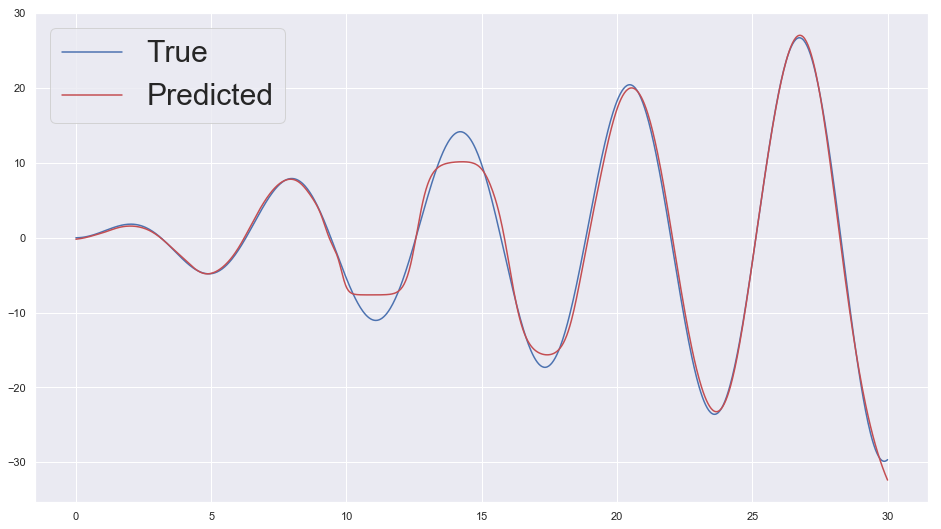

In [25]:
visualize_predictions(x_train, y_train, deep_model)

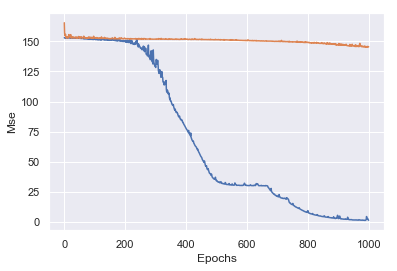

In [26]:
plt.plot(range(len(deep_history.history['loss'])), deep_history.history['loss'])
plt.plot(range(len(wide_history.history['loss'])), wide_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.show()

# Самые разные сложности с архитектурой

In [27]:
x_train, y_train = create_data(-30, 30, 2000, x_sin)
deep_model = create_deep_model([30,70])
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
2000/2000 [==============================] - 0s 198us/step - loss: 153.7821 - mean_squared_error: 153.7821
Epoch 2/1000
2000/2000 [==============================] - 0s 9us/step - loss: 154.4295 - mean_squared_error: 154.4295
Epoch 3/1000
2000/2000 [==============================] - 0s 9us/step - loss: 153.2664 - mean_squared_error: 153.2664
Epoch 4/1000
2000/2000 [==============================] - 0s 8us/step - loss: 152.9386 - mean_squared_error: 152.9386
Epoch 5/1000
2000/2000 [==============================] - 0s 8us/step - loss: 152.9045 - mean_squared_error: 152.9045
Epoch 6/1000
2000/2000 [==============================] - 0s 8us/step - loss: 152.9702 - mean_squared_error: 152.9702
Epoch 7/1000
2000/2000 [==============================] - 0s 9us/step - loss: 153.0707 - mean_squared_error: 153.0707
Epoch 8/1000
2000/2000 [==============================] - 0s 8us/step - loss: 152.9562 - mean_squared_error: 152.9562
Epoch 9/1000
2000/2000 [==============================

2000/2000 [==============================] - 0s 9us/step - loss: 152.8367 - mean_squared_error: 152.8367
Epoch 70/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8336 - mean_squared_error: 152.8336
Epoch 71/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7918 - mean_squared_error: 152.7918
Epoch 72/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8078 - mean_squared_error: 152.8078
Epoch 73/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8112 - mean_squared_error: 152.8112
Epoch 74/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7946 - mean_squared_error: 152.7946
Epoch 75/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8521 - mean_squared_error: 152.8521
Epoch 76/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7840 - mean_squared_error: 152.7840
Epoch 77/1000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 9us/step - loss: 152.7153 - mean_squared_error: 152.7153
Epoch 138/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8534 - mean_squared_error: 152.8534
Epoch 139/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6633 - mean_squared_error: 152.6633
Epoch 140/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5415 - mean_squared_error: 152.5415
Epoch 141/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4280 - mean_squared_error: 152.4280
Epoch 142/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6502 - mean_squared_error: 152.6502
Epoch 143/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7617 - mean_squared_error: 152.7617
Epoch 144/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8946 - mean_squared_error: 152.8946
Epoch 145/1000
2000/2000 [=============================

2000/2000 [==============================] - 0s 9us/step - loss: 152.6064 - mean_squared_error: 152.6064
Epoch 206/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7447 - mean_squared_error: 152.7447
Epoch 207/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8275 - mean_squared_error: 152.8275
Epoch 208/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8550 - mean_squared_error: 152.8550
Epoch 209/1000
2000/2000 [==============================] - 0s 12us/step - loss: 152.8292 - mean_squared_error: 152.8292
Epoch 210/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9349 - mean_squared_error: 152.9349
Epoch 211/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8216 - mean_squared_error: 152.8216
Epoch 212/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8142 - mean_squared_error: 152.8142
Epoch 213/1000
2000/2000 [=======================

2000/2000 [==============================] - 0s 10us/step - loss: 152.7599 - mean_squared_error: 152.7599
Epoch 273/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8334 - mean_squared_error: 152.8334
Epoch 274/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9487 - mean_squared_error: 152.9487
Epoch 275/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8800 - mean_squared_error: 152.8800
Epoch 276/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7737 - mean_squared_error: 152.7737
Epoch 277/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7657 - mean_squared_error: 152.7657
Epoch 278/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7635 - mean_squared_error: 152.7635
Epoch 279/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7609 - mean_squared_error: 152.7609
Epoch 280/1000
2000/2000 [=======================

2000/2000 [==============================] - 0s 10us/step - loss: 152.7814 - mean_squared_error: 152.7814
Epoch 341/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.7630 - mean_squared_error: 152.7630
Epoch 342/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7471 - mean_squared_error: 152.7471
Epoch 343/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.7919 - mean_squared_error: 152.7919
Epoch 344/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8194 - mean_squared_error: 152.8194
Epoch 345/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7545 - mean_squared_error: 152.7545
Epoch 346/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7348 - mean_squared_error: 152.7348
Epoch 347/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6774 - mean_squared_error: 152.6774
Epoch 348/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 10us/step - loss: 152.6924 - mean_squared_error: 152.6924
Epoch 409/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6926 - mean_squared_error: 152.6926
Epoch 410/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.6851 - mean_squared_error: 152.6851
Epoch 411/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7113 - mean_squared_error: 152.7113
Epoch 412/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7844 - mean_squared_error: 152.7844
Epoch 413/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7154 - mean_squared_error: 152.7154
Epoch 414/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7402 - mean_squared_error: 152.7402
Epoch 415/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.6938 - mean_squared_error: 152.6938
Epoch 416/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 10us/step - loss: 152.4243 - mean_squared_error: 152.4243
Epoch 476/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.3875 - mean_squared_error: 152.3875
Epoch 477/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4320 - mean_squared_error: 152.4320
Epoch 478/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.4567 - mean_squared_error: 152.4567
Epoch 479/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4037 - mean_squared_error: 152.4037
Epoch 480/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.5287 - mean_squared_error: 152.5287
Epoch 481/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.5445 - mean_squared_error: 152.5445
Epoch 482/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5957 - mean_squared_error: 152.5957
Epoch 483/1000
2000/2000 [=========================

2000/2000 [==============================] - 0s 10us/step - loss: 151.5710 - mean_squared_error: 151.5710
Epoch 544/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.1071 - mean_squared_error: 152.1071
Epoch 545/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.8243 - mean_squared_error: 151.8243
Epoch 546/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.5862 - mean_squared_error: 151.5862
Epoch 547/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.2573 - mean_squared_error: 151.2573
Epoch 548/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.0000 - mean_squared_error: 152.0000
Epoch 549/1000
2000/2000 [==============================] - 0s 10us/step - loss: 151.9041 - mean_squared_error: 151.9041
Epoch 550/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.6485 - mean_squared_error: 151.6485
Epoch 551/1000
2000/2000 [==========================

2000/2000 [==============================] - 0s 10us/step - loss: 150.5504 - mean_squared_error: 150.5504
Epoch 612/1000
2000/2000 [==============================] - 0s 11us/step - loss: 149.8205 - mean_squared_error: 149.8205
Epoch 613/1000
2000/2000 [==============================] - 0s 10us/step - loss: 147.7375 - mean_squared_error: 147.7375
Epoch 614/1000
2000/2000 [==============================] - 0s 10us/step - loss: 149.4548 - mean_squared_error: 149.4548
Epoch 615/1000
2000/2000 [==============================] - 0s 11us/step - loss: 151.7506 - mean_squared_error: 151.7506
Epoch 616/1000
2000/2000 [==============================] - 0s 11us/step - loss: 151.1882 - mean_squared_error: 151.1882
Epoch 617/1000
2000/2000 [==============================] - 0s 10us/step - loss: 150.1864 - mean_squared_error: 150.1864
Epoch 618/1000
2000/2000 [==============================] - 0s 10us/step - loss: 149.2648 - mean_squared_error: 149.2648
Epoch 619/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 10us/step - loss: 151.8984 - mean_squared_error: 151.8984
Epoch 679/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.7571 - mean_squared_error: 151.7571
Epoch 680/1000
2000/2000 [==============================] - 0s 10us/step - loss: 151.7493 - mean_squared_error: 151.7493
Epoch 681/1000
2000/2000 [==============================] - 0s 10us/step - loss: 151.6505 - mean_squared_error: 151.6505
Epoch 682/1000
2000/2000 [==============================] - 0s 10us/step - loss: 151.6774 - mean_squared_error: 151.6774
Epoch 683/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.6045 - mean_squared_error: 151.6045
Epoch 684/1000
2000/2000 [==============================] - 0s 10us/step - loss: 151.5603 - mean_squared_error: 151.5603
Epoch 685/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.4736 - mean_squared_error: 151.4736
Epoch 686/1000
2000/2000 [========================

2000/2000 [==============================] - 0s 9us/step - loss: 119.1618 - mean_squared_error: 119.1618
Epoch 747/1000
2000/2000 [==============================] - 0s 10us/step - loss: 117.8361 - mean_squared_error: 117.8361
Epoch 748/1000
2000/2000 [==============================] - 0s 10us/step - loss: 118.0284 - mean_squared_error: 118.0284
Epoch 749/1000
2000/2000 [==============================] - 0s 9us/step - loss: 117.3912 - mean_squared_error: 117.3912
Epoch 750/1000
2000/2000 [==============================] - 0s 10us/step - loss: 117.2339 - mean_squared_error: 117.2339
Epoch 751/1000
2000/2000 [==============================] - 0s 9us/step - loss: 116.7734 - mean_squared_error: 116.7734
Epoch 752/1000
2000/2000 [==============================] - 0s 9us/step - loss: 117.2661 - mean_squared_error: 117.2661
Epoch 753/1000
2000/2000 [==============================] - 0s 10us/step - loss: 116.6919 - mean_squared_error: 116.6919
Epoch 754/1000
2000/2000 [=========================

2000/2000 [==============================] - 0s 11us/step - loss: 98.3722 - mean_squared_error: 98.3722
Epoch 814/1000
2000/2000 [==============================] - 0s 11us/step - loss: 98.2549 - mean_squared_error: 98.2549
Epoch 815/1000
2000/2000 [==============================] - 0s 11us/step - loss: 97.2094 - mean_squared_error: 97.2094
Epoch 816/1000
2000/2000 [==============================] - 0s 11us/step - loss: 94.5893 - mean_squared_error: 94.5893
Epoch 817/1000
2000/2000 [==============================] - 0s 12us/step - loss: 94.6273 - mean_squared_error: 94.6273
Epoch 818/1000
2000/2000 [==============================] - 0s 11us/step - loss: 93.0037 - mean_squared_error: 93.0037
Epoch 819/1000
2000/2000 [==============================] - 0s 10us/step - loss: 94.4996 - mean_squared_error: 94.4996
Epoch 820/1000
2000/2000 [==============================] - 0s 10us/step - loss: 93.4933 - mean_squared_error: 93.4933
Epoch 821/1000
2000/2000 [==============================] - 0s 

Epoch 882/1000
2000/2000 [==============================] - 0s 11us/step - loss: 49.5899 - mean_squared_error: 49.5899
Epoch 883/1000
2000/2000 [==============================] - 0s 11us/step - loss: 49.2131 - mean_squared_error: 49.2131
Epoch 884/1000
2000/2000 [==============================] - 0s 10us/step - loss: 50.0011 - mean_squared_error: 50.0011
Epoch 885/1000
2000/2000 [==============================] - 0s 11us/step - loss: 51.8599 - mean_squared_error: 51.8599
Epoch 886/1000
2000/2000 [==============================] - 0s 12us/step - loss: 49.3143 - mean_squared_error: 49.3143
Epoch 887/1000
2000/2000 [==============================] - 0s 11us/step - loss: 47.8778 - mean_squared_error: 47.8778
Epoch 888/1000
2000/2000 [==============================] - 0s 10us/step - loss: 47.9520 - mean_squared_error: 47.9520
Epoch 889/1000
2000/2000 [==============================] - 0s 10us/step - loss: 51.3237 - mean_squared_error: 51.3237
Epoch 890/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 9us/step - loss: 33.9401 - mean_squared_error: 33.9401
Epoch 951/1000
2000/2000 [==============================] - 0s 9us/step - loss: 34.3318 - mean_squared_error: 34.3318
Epoch 952/1000
2000/2000 [==============================] - 0s 9us/step - loss: 34.0835 - mean_squared_error: 34.0835
Epoch 953/1000
2000/2000 [==============================] - 0s 9us/step - loss: 33.1903 - mean_squared_error: 33.1903
Epoch 954/1000
2000/2000 [==============================] - 0s 9us/step - loss: 32.1647 - mean_squared_error: 32.1647
Epoch 955/1000
2000/2000 [==============================] - 0s 9us/step - loss: 32.1468 - mean_squared_error: 32.1468
Epoch 956/1000
2000/2000 [==============================] - 0s 9us/step - loss: 32.9472 - mean_squared_error: 32.9472
Epoch 957/1000
2000/2000 [==============================] - 0s 9us/step - loss: 33.6909 - mean_squared_error: 33.6909
Epoch 958/1000
2000/2000 [==============================] - 0s 9us/step

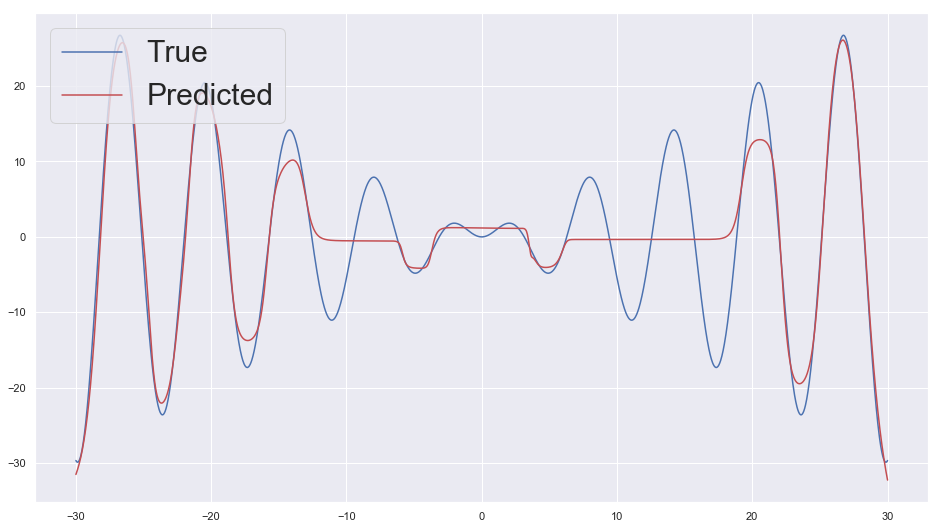

In [28]:
visualize_predictions(x_train, y_train, deep_model)

In [29]:
x_train, y_train = create_data(-30, 30, 2000, x_sin)
deep_model = create_deep_model([128,64,64])
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
2000/2000 [==============================] - 0s 187us/step - loss: 153.2848 - mean_squared_error: 153.2848
Epoch 2/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.0416 - mean_squared_error: 153.0416
Epoch 3/1000
2000/2000 [==============================] - 0s 11us/step - loss: 153.0011 - mean_squared_error: 153.0011
Epoch 4/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.0724 - mean_squared_error: 153.0724
Epoch 5/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.2599 - mean_squared_error: 153.2599
Epoch 6/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.2196 - mean_squared_error: 153.2196
Epoch 7/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.9899 - mean_squared_error: 152.9899
Epoch 8/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.9924 - mean_squared_error: 152.9924
Epoch 9/1000
2000/2000 [=========================

2000/2000 [==============================] - 0s 10us/step - loss: 152.9056 - mean_squared_error: 152.9056
Epoch 70/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9309 - mean_squared_error: 152.9309
Epoch 71/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.0082 - mean_squared_error: 153.0082
Epoch 72/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8944 - mean_squared_error: 152.8944
Epoch 73/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9679 - mean_squared_error: 152.9679
Epoch 74/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9698 - mean_squared_error: 152.9698
Epoch 75/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9200 - mean_squared_error: 152.9200
Epoch 76/1000
2000/2000 [==============================] - 0s 11us/step - loss: 153.0527 - mean_squared_error: 153.0527
Epoch 77/1000
2000/2000 [=============================

2000/2000 [==============================] - 0s 11us/step - loss: 152.3869 - mean_squared_error: 152.3869
Epoch 137/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.2556 - mean_squared_error: 152.2556
Epoch 138/1000
2000/2000 [==============================] - 0s 12us/step - loss: 151.8442 - mean_squared_error: 151.8442
Epoch 139/1000
2000/2000 [==============================] - 0s 12us/step - loss: 151.7011 - mean_squared_error: 151.7011
Epoch 140/1000
2000/2000 [==============================] - 0s 12us/step - loss: 151.6777 - mean_squared_error: 151.6777
Epoch 141/1000
2000/2000 [==============================] - 0s 11us/step - loss: 151.2058 - mean_squared_error: 151.2058
Epoch 142/1000
2000/2000 [==============================] - 0s 11us/step - loss: 150.8613 - mean_squared_error: 150.8613
Epoch 143/1000
2000/2000 [==============================] - 0s 12us/step - loss: 150.9327 - mean_squared_error: 150.9327
Epoch 144/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 11us/step - loss: 128.2211 - mean_squared_error: 128.2211
Epoch 204/1000
2000/2000 [==============================] - 0s 11us/step - loss: 129.0546 - mean_squared_error: 129.0546
Epoch 205/1000
2000/2000 [==============================] - 0s 11us/step - loss: 128.1494 - mean_squared_error: 128.1494
Epoch 206/1000
2000/2000 [==============================] - 0s 11us/step - loss: 129.5660 - mean_squared_error: 129.5660
Epoch 207/1000
2000/2000 [==============================] - 0s 11us/step - loss: 127.5822 - mean_squared_error: 127.5822
Epoch 208/1000
2000/2000 [==============================] - 0s 11us/step - loss: 127.8487 - mean_squared_error: 127.8487
Epoch 209/1000
2000/2000 [==============================] - 0s 11us/step - loss: 127.0277 - mean_squared_error: 127.0277
Epoch 210/1000
2000/2000 [==============================] - 0s 10us/step - loss: 127.8967 - mean_squared_error: 127.8967
Epoch 211/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 10us/step - loss: 80.4583 - mean_squared_error: 80.4583
Epoch 271/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.8212 - mean_squared_error: 80.8212
Epoch 272/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.5781 - mean_squared_error: 80.5781
Epoch 273/1000
2000/2000 [==============================] - 0s 10us/step - loss: 81.2849 - mean_squared_error: 81.2849
Epoch 274/1000
2000/2000 [==============================] - 0s 10us/step - loss: 81.0881 - mean_squared_error: 81.0881
Epoch 275/1000
2000/2000 [==============================] - 0s 11us/step - loss: 85.2063 - mean_squared_error: 85.2063
Epoch 276/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.5598 - mean_squared_error: 82.5598
Epoch 277/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.3171 - mean_squared_error: 82.3171
Epoch 278/1000
2000/2000 [==============================] - 0s 

Epoch 339/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.6615 - mean_squared_error: 79.6615
Epoch 340/1000
2000/2000 [==============================] - 0s 11us/step - loss: 80.1724 - mean_squared_error: 80.1724
Epoch 341/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.6573 - mean_squared_error: 80.6573
Epoch 342/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.9459 - mean_squared_error: 79.9459
Epoch 343/1000
2000/2000 [==============================] - 0s 11us/step - loss: 80.2021 - mean_squared_error: 80.2021
Epoch 344/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.0884 - mean_squared_error: 80.0884
Epoch 345/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.9394 - mean_squared_error: 79.9394
Epoch 346/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.9267 - mean_squared_error: 79.9267
Epoch 347/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 10us/step - loss: 79.6679 - mean_squared_error: 79.6679
Epoch 408/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.1849 - mean_squared_error: 80.1849
Epoch 409/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.8811 - mean_squared_error: 80.8811
Epoch 410/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.5459 - mean_squared_error: 79.5459
Epoch 411/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.9708 - mean_squared_error: 79.9708
Epoch 412/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.2957 - mean_squared_error: 82.2957
Epoch 413/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.4313 - mean_squared_error: 80.4313
Epoch 414/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.6635 - mean_squared_error: 79.6635
Epoch 415/1000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 11us/step - loss: 79.6771 - mean_squared_error: 79.6771
Epoch 476/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.9873 - mean_squared_error: 79.9873
Epoch 477/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.5285 - mean_squared_error: 79.5285
Epoch 478/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.3682 - mean_squared_error: 79.3682
Epoch 479/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.1701 - mean_squared_error: 79.1701
Epoch 480/1000
2000/2000 [==============================] - 0s 12us/step - loss: 79.5219 - mean_squared_error: 79.5219
Epoch 481/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.5929 - mean_squared_error: 79.5929
Epoch 482/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.4474 - mean_squared_error: 79.4474
Epoch 483/1000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 10us/step - loss: 79.2093 - mean_squared_error: 79.2093
Epoch 544/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.3522 - mean_squared_error: 79.3522
Epoch 545/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.2604 - mean_squared_error: 79.2604
Epoch 546/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.0041 - mean_squared_error: 79.0041
Epoch 547/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.2556 - mean_squared_error: 79.2556
Epoch 548/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.0140 - mean_squared_error: 79.0140
Epoch 549/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.4984 - mean_squared_error: 79.4984
Epoch 550/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.3696 - mean_squared_error: 79.3696
Epoch 551/1000
2000/2000 [==============================] - 0s 

Epoch 612/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.6142 - mean_squared_error: 79.6142
Epoch 613/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.6944 - mean_squared_error: 79.6944
Epoch 614/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.5401 - mean_squared_error: 79.5401
Epoch 615/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.7036 - mean_squared_error: 79.7036
Epoch 616/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.7023 - mean_squared_error: 79.7023
Epoch 617/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.6702 - mean_squared_error: 79.6702
Epoch 618/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.5750 - mean_squared_error: 79.5750
Epoch 619/1000
2000/2000 [==============================] - 0s 10us/step - loss: 80.2412 - mean_squared_error: 80.2412
Epoch 620/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 10us/step - loss: 79.2244 - mean_squared_error: 79.2244
Epoch 681/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.3762 - mean_squared_error: 79.3762
Epoch 682/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.1337 - mean_squared_error: 79.1337
Epoch 683/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.0297 - mean_squared_error: 79.0297
Epoch 684/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9513 - mean_squared_error: 78.9513
Epoch 685/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.3361 - mean_squared_error: 79.3361
Epoch 686/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.3365 - mean_squared_error: 79.3365
Epoch 687/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9225 - mean_squared_error: 78.9225
Epoch 688/1000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 10us/step - loss: 78.9355 - mean_squared_error: 78.9355
Epoch 749/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9102 - mean_squared_error: 78.9102
Epoch 750/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9887 - mean_squared_error: 78.9887
Epoch 751/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9516 - mean_squared_error: 78.9516
Epoch 752/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.2919 - mean_squared_error: 79.2919
Epoch 753/1000
2000/2000 [==============================] - 0s 10us/step - loss: 84.4563 - mean_squared_error: 84.4563
Epoch 754/1000
2000/2000 [==============================] - 0s 10us/step - loss: 88.7207 - mean_squared_error: 88.7207
Epoch 755/1000
2000/2000 [==============================] - 0s 10us/step - loss: 81.5806 - mean_squared_error: 81.5806
Epoch 756/1000
2000/2000 [==============================] - 0s 

Epoch 817/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9797 - mean_squared_error: 78.9797
Epoch 818/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9741 - mean_squared_error: 78.9741
Epoch 819/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9881 - mean_squared_error: 78.9881
Epoch 820/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.9860 - mean_squared_error: 78.9860
Epoch 821/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.1504 - mean_squared_error: 79.1504
Epoch 822/1000
2000/2000 [==============================] - 0s 11us/step - loss: 80.9609 - mean_squared_error: 80.9609
Epoch 823/1000
2000/2000 [==============================] - 0s 11us/step - loss: 83.3803 - mean_squared_error: 83.3803
Epoch 824/1000
2000/2000 [==============================] - 0s 11us/step - loss: 80.9798 - mean_squared_error: 80.9798
Epoch 825/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 10us/step - loss: 79.0508 - mean_squared_error: 79.0508
Epoch 886/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9913 - mean_squared_error: 78.9913
Epoch 887/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.1193 - mean_squared_error: 79.1193
Epoch 888/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.0068 - mean_squared_error: 79.0068
Epoch 889/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9200 - mean_squared_error: 78.9200
Epoch 890/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.0924 - mean_squared_error: 79.0924
Epoch 891/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.0061 - mean_squared_error: 79.0061
Epoch 892/1000
2000/2000 [==============================] - 0s 10us/step - loss: 79.0595 - mean_squared_error: 79.0595
Epoch 893/1000
2000/2000 [==============================] - 0s 

Epoch 954/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.3144 - mean_squared_error: 79.3144
Epoch 955/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.5069 - mean_squared_error: 79.5069
Epoch 956/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.1478 - mean_squared_error: 79.1478
Epoch 957/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.9900 - mean_squared_error: 78.9900
Epoch 958/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.0379 - mean_squared_error: 79.0379
Epoch 959/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.7460 - mean_squared_error: 79.7460
Epoch 960/1000
2000/2000 [==============================] - 0s 11us/step - loss: 83.1542 - mean_squared_error: 83.1542
Epoch 961/1000
2000/2000 [==============================] - 0s 11us/step - loss: 82.3756 - mean_squared_error: 82.3756
Epoch 962/1000
2000/2000 [======================

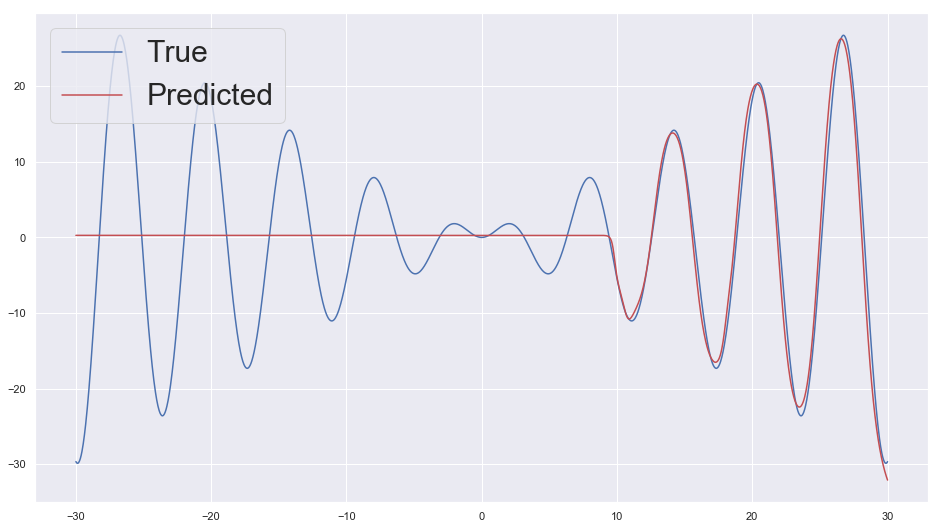

In [30]:
visualize_predictions(x_train, y_train, deep_model)